In [2]:
import nltk
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist

import numpy as np 
from matplotlib import pyplot as plt 

%matplotlib inline

stopwords = stopwords.words('english')

file = open('shawnee_chron.txt').read()

tokens = word_tokenize(file)

#Make all words lowercase
tokens_lower = [w.lower() for w in tokens]

<h2>Usage of "indian" versus "shawnee"</h2>



In [3]:
shawnee_text = nltk.Text(tokens_lower)

shawnee_text.concordance('indian')

Displaying 25 of 89 matches:
t and a party of volunteers with an indian officer and some savages were sent 
 & newspaper from mr. mckee who was indian agent for the crown and has been a 
 from kaskaskia to this place . the indian chief , who is not yet returned fro
siderable and our alliance with the indian nations so extended that the spania
from kaskaskias to this place . the indian chief , who is not yet returned fro
siderable and our alliance with the indian nations so extended that the spania
settlement , my little knowledge in indian matters prompts me to wish you on t
ees , delawares and other prominent indian tribes were so exceedingly troubles
hopelessness of a march through the indian country without a formidable body o
ity of a winter campaign , when the indian warriors would be hunting and the e
ngent of artillery , and a thousand indian warriors to divert attention from t
the contemplated attack by the same indian contingent on cahokia and the other
 clark 's presence turn

In [4]:
shawnee_text.concordance('shawnee')

Displaying 25 of 92 matches:
nd twenty five warriors , mingoes , shawnee & delaware 's with a number of wive
d last year . april the ist . forty shawnee arrived having four prisoners , who
n named lorimier engaged four score shawnee from tchelacase and pecori '' to go
en easily done with success . these shawnee delivered up four of their prisoner
 , and has great influence with the shawnee is well acquainted with the country
d in this return of savages ] . the shawnee are expected this night with captai
her to go up the ohio to assist the shawnee , a third to come to this place to 
sist . 26th january . this day some shawnee who were last year at detroit and p
o come this way in the spring . the shawnee are inveterate against the virginia
one of the blockhouses . a party of shawnee , delaware and piankeshaw set off o
tions assembled at fort sackville : shawnee , ottawa , chippewa , wyandot , mia
 . he then addressed himself to the shawnee and delaware in particular exhortin
of life has

In [5]:
#Remove stopwords, punctuation, and numbers.
content = [w for w in tokens_lower if w not in stopwords and w.isalpha()]

#Check to see what the content looks like.
print(content)

['henry', 'hamilton', 'guy', 'detroit', 'mi', 'sir', 'last', 'letter', 'honor', 'writing', 'excellency', 'dated', 'january', 'january', 'traders', 'sandusky', 'given', 'room', 'suspecting', 'carrying', 'correspondence', 'rebels', 'ordered', 'search', 'made', 'papers', 'notice', 'though', 'well', 'assured', 'suspicions', 'well', 'grounded', 'eluded', 'search', 'however', 'upon', 'examining', 'goods', 'carried', 'comparing', 'invoices', 'considerable', 'quantity', 'found', 'pass', 'asked', 'offenders', 'fined', 'extent', 'prescribed', 'ordinance', 'quebec', 'january', 'john', 'montour', 'formerly', 'mentioned', 'excellency', 'decoyed', 'settlement', 'three', 'virginians', 'prisoners', 'designing', 'carried', 'fort', 'pitt', 'indians', 'met', 'leagues', 'suspected', 'fugitives', 'gave', 'notice', 'party', 'volunteers', 'indian', 'officer', 'savages', 'sent', 'took', 'brought', 'prepared', 'arms', 'meant', 'stood', 'defensive', 'surprised', 'bound', 'montour', 'earnest', 'sollicitations', 

<FreqDist with 6034 samples and 29721 outcomes>


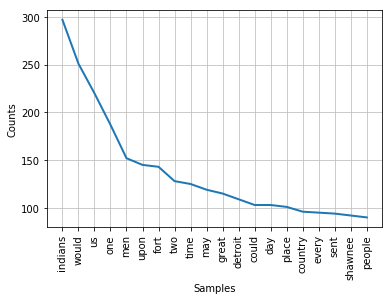

In [6]:
#Import matplot lib to graph the top 20 most frequently occurring words, 
#and from NLTK, import FreqDist to generate the frequency list.
import matplotlib
from nltk import FreqDist

#Provide the pre-processed content as the argument for the FreqDist function.
fdist1 = FreqDist(content)
#Print the number of unique words/tokens in document/corpus (samples) 
#and the total number of times those tokens appear (outcomes).
print(fdist1)

#Identify the 20 most frequently occurring tokens and plot them.
fdist1.most_common(20)

fdist1.plot(20)

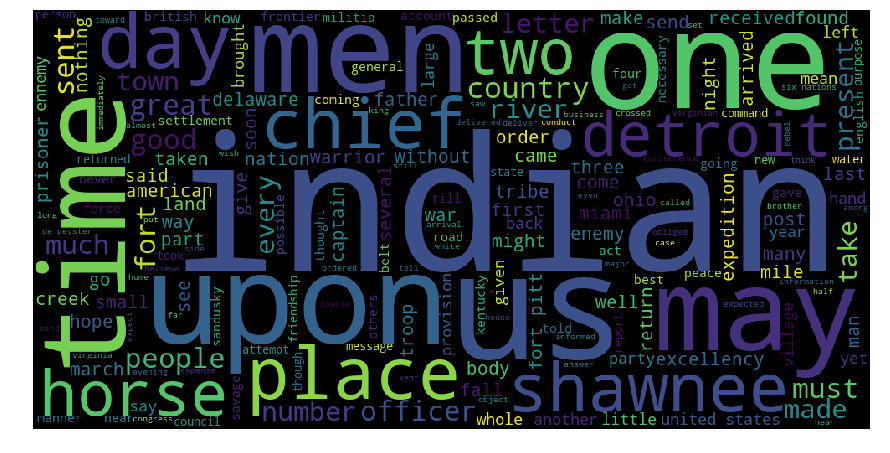

In [7]:
from wordcloud import WordCloud, STOPWORDS 

text = ' '.join(content) #join elements to convert a list into a string

wordcloud = WordCloud(width = 1000, height = 500).generate(text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [8]:
#The Porter stemmer from NLTK was chosen for this example because it leaves more of the original word intact, 
#whereas the Lancaster stemmer is more aggressive and removes additional letters from the original word.
porter = nltk.PorterStemmer()

stemmed = [porter.stem(t) for t in content]

#Print the tokenized and stemmed results after removing the stopwords to see how the stemmer functions.
#print(stemmed)

<FreqDist with 4272 samples and 29721 outcomes>


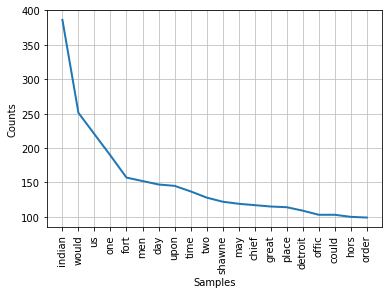

In [9]:
#Create a frequency distribution of the stemmed tokens.
fdist2 = FreqDist(stemmed)

#Print the number of samples and outcomes, notice that there are fewer unique words. This is the point of a stemmer.
#Stemming becomes much more important for this reason when you begin to work with more advanced computational 
#techniques, such as Vector Space Models, because it reduces the dimensionality of the high-dimensional space
#you create, which makes processing the text more efficient, and, therefore, faster.
print(fdist2)

#Identify and graph the top 20 most frequently occurring stemmed words. 
#Notice that all variants of brother reduce to this root.
fdist2.most_common(20)

fdist2.plot(20)


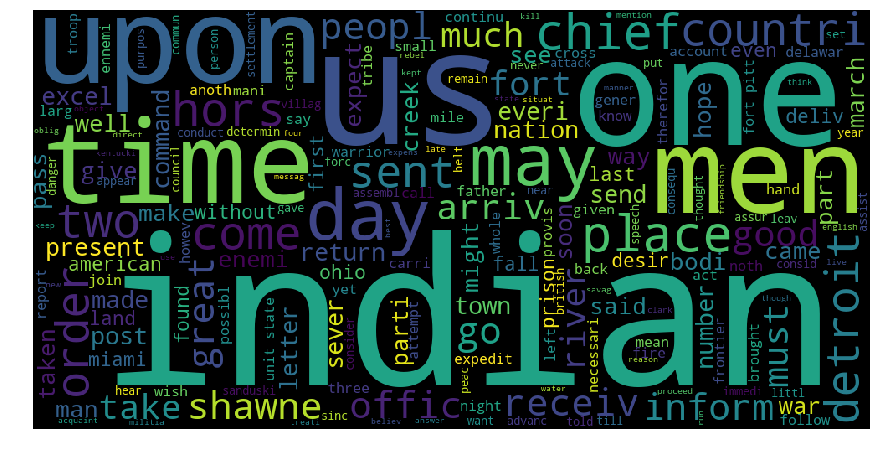

In [10]:
text2 = ' '.join(stemmed)

wordcloud = WordCloud(width = 1000, height = 500).generate(text2)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

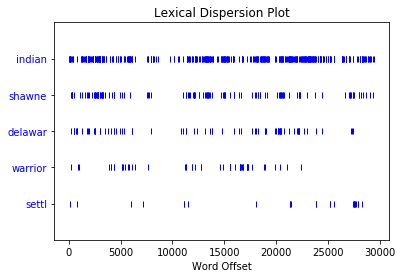

In [11]:
from nltk.draw.dispersion import dispersion_plot

dispersion_plot(stemmed, ['indian', 'shawne', 'delawar','warrior', 'settl'])

In [13]:
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures

biagram_collocation = BigramCollocationFinder.from_words(content) 
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
from nltk.collocations import TrigramCollocationFinder 
from nltk.metrics import TrigramAssocMeasures 

trigram_collocation = TrigramCollocationFinder.from_words(content)  
trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 15)

In [ ]:
shawnee_text.concordance('deliver')